# Week 4 Pre-Class Assignment 2

## Problem 1

In [2]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
X = data.loc[:,["GrLivArea", "YearBuilt"]]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


## Problem 2

In [7]:
from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_2 = scr.fit_transform(X.values) #Preprocessing

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

lr_1 = LinearRegression()
y = np.array(data.loc[:,'SalePrice'].values)
X_Gr = X_2[:,0].reshape(-1,1)
X_train,X_test,y_train, y_test = train_test_split(X_Gr, y, test_size=0.2, shuffle=True)
lr_1 = lr_1.fit(X_train, y_train)

y_pred1 = lr_1.predict(X_test)
score1 = mean_squared_error(y_test,y_pred1)
print('Mean Squared Error for the feature GrLivArea: {}'.format(score1))


lr_2 = LinearRegression()
X_YB = X_2[:,1].reshape(-1,1)
X_train,X_test,y_train, y_test = train_test_split(X_YB, y, test_size=0.2, shuffle=True)
lr_2 = lr_2.fit(X_train,y_train)

y_pred2 = lr_2.predict(X_test)
score2 = mean_squared_error(y_test,y_pred2)
print('Mean Squared Error for the feature YearBuilt: {}'.format(score2))

Mean Squared Error for the feature GrLivArea: 3572964172.5080853
Mean Squared Error for the feature YearBuilt: 4153419818.670032


Now let's visualize the results

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def decision_region(df,classifier):
    X3 = df.iloc[:,0]
    y = df.iloc[:,1]
    plt.scatter(X3,y,color='crimson')
    X_min,X_max = np.min(X3),np.max(X3)
    X3 = np.linspace(X_min,X_max,1000)
    pred = classifier.predict(X3.reshape(-1,1))
    plt.plot(X3,pred)

X_4 = pd.DataFrame(data=X_2, columns=['GrLivArea','YearBuilt'])
X_4['SalePrice'] = y
X_4.head()

,GrLivArea,YearBuilt,SalePrice
0,0.370333,1.050994,208500
1,-0.482512,0.156734,181500
2,0.515013,0.984752,223500
3,0.383659,-1.863632,140000
4,1.299326,0.951632,250000


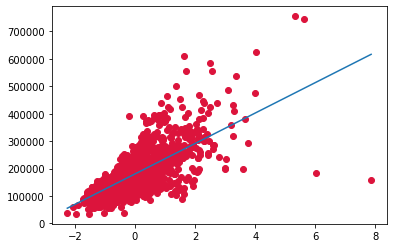

In [11]:
#For the YearBuilt
X_5 = X_4.copy()
del X_5['YearBuilt']
decision_region(X_5,lr_1)

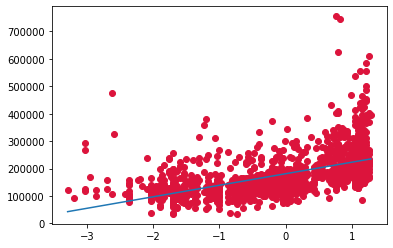

In [13]:
#For the GrLivArea 
X_6 = X_4.copy()
del X_6['GrLivArea']
decision_region(X_6,lr_2)

## Problem 3

In [20]:
def run_different_methods(estimator_list,df,est_names,v=mean_squared_error):
    lr_dic = {}
    scores = {}
    X7 = df.iloc[:,0].values.reshape(-1,1)
    y = df.iloc[:,1].values
    X_train,X_test,y_train,y_test = train_test_split(X7,y,test_size=0.2,shuffle=True)
    for estimator,est_name in zip(estimator_list,est_names):
        lr = estimator.fit(X_train,y_train)
        lr_dic[est_name] = lr
    
    plt.figure(1,figsize=(15,15))
    count = 1
    for est_name in est_names:
        plt.subplot(len(estimator_list),1,count)
        plt.scatter(X7,y)
        X_min,X_max = np.min(X7)-1,np.max(X7)+1
        X_smp = np.linspace(X_min,X_max,1000)
        y_pred_smp = lr_dic[est_name].predict(X_smp.reshape(-1,1))
        plt.plot(X_smp,y_pred_smp)
        plt.title(est_name+ ' plot')
        count += 1
        
        y_pred = lr_dic[est_name].predict(X_test)
        scores[est_name] = v(y_test,y_pred)
    return scores

Now let's visualize for the case of the two features based on the different methods.

In [22]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
case1 = LinearRegression()
case2 = SVR()
case3 = DecisionTreeRegressor()
case4 = RandomForestRegressor()
cases = [case1,case2,case3,case4]
est_names = ['LinearRegression','SVM','DecisionTree','RandomForest']

**For the GrLivArea**

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


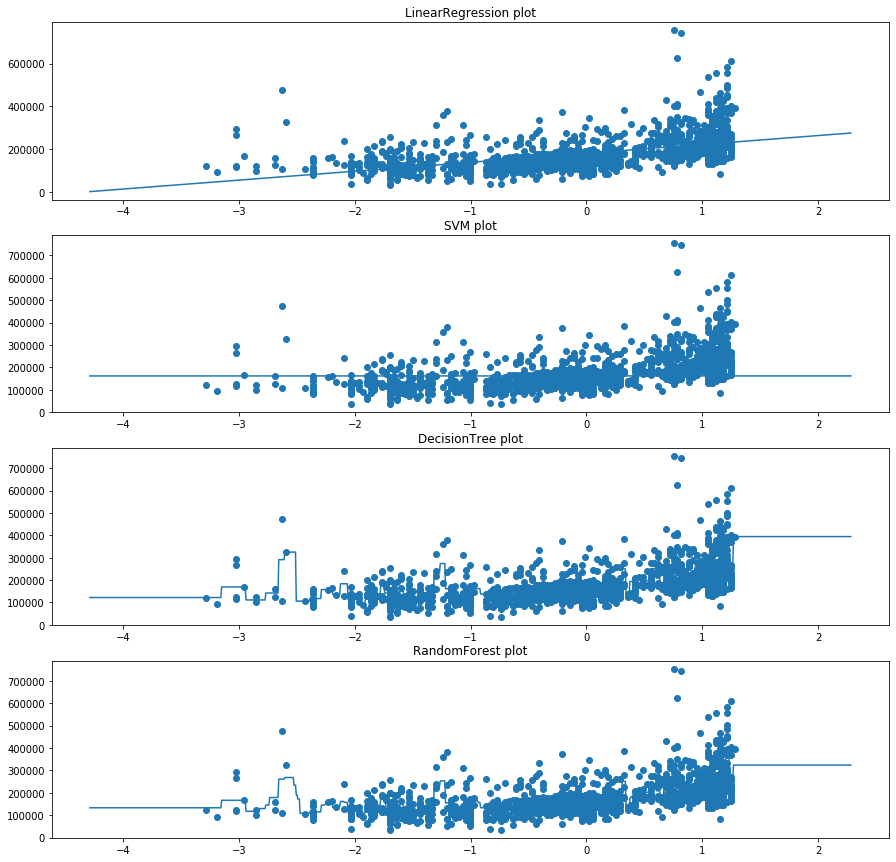

In [24]:
First_Feature = run_different_methods(cases,X_6,est_names)

**For the YearBuilt**

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


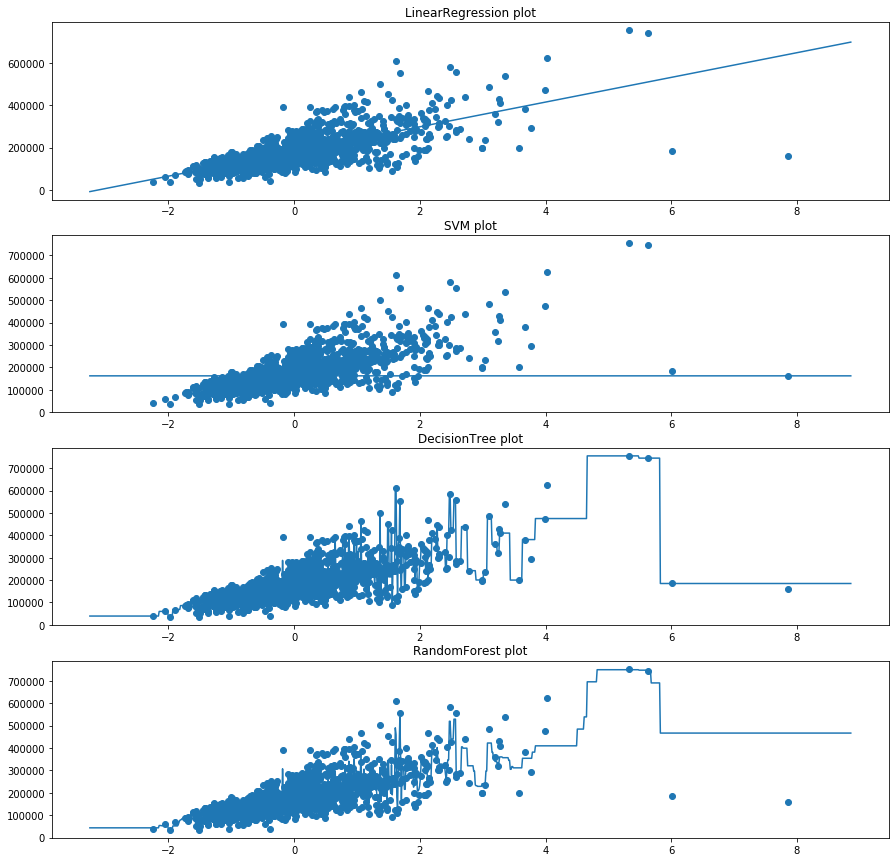

In [25]:
Second_Feature = run_different_methods(cases,X_5,est_names)

**Let's summarize the values in one table**

In [27]:
table = pd.DataFrame()
table['GrLivArea'] = First_Feature.values()
table['YearBuilt'] = Second_Feature.values()
table.index = Second_Feature.keys()
table

,GrLivArea,YearBuilt
LinearRegression,3.921740e+09,3.563613e+09
SVM,5.926467e+09,6.532144e+09
DecisionTree,3.536818e+09,5.664077e+09
RandomForest,3.576969e+09,5.007041e+09


**The decision tree and random forest for the GrlivArea Feature give us a better evaluation based on the previous table. Concerning the feature Yearbuilt, the Linear regression takes the lead.**


## Problem 4 (Advance Task)

Let's add the features GarageArea, TotalBsmtSF and 1stFlrSF in order to verify what happen with more data in the processing.

In [28]:
X_10 = data.loc[:,["GrLivArea", "YearBuilt",  "GarageArea", "TotalBsmtSF", "1stFlrSF"]]
X_10.head()

,GrLivArea,YearBuilt,GarageArea,TotalBsmtSF,1stFlrSF
0,1710,2003,548,856,856
1,1262,1976,460,1262,1262
2,1786,2001,608,920,920
3,1717,1915,642,756,961
4,2198,2000,836,1145,1145


In [29]:
X_10_2 = scr.fit_transform(X_10.values) #Preprocessing

In [30]:
X_11 = pd.DataFrame(data=X_10_2, columns=["GrLivArea","YearBuilt", "GarageArea", "TotalBsmtSF", "1stFlrSF"])
X_11['SalePrice'] = y
X_11.head()

,GrLivArea,YearBuilt,GarageArea,TotalBsmtSF,1stFlrSF,SalePrice
0,0.370333,1.050994,0.351000,-0.459303,-0.793434,208500
1,-0.482512,0.156734,-0.060731,0.466465,0.257140,181500
2,0.515013,0.984752,0.631726,-0.313369,-0.627826,223500
3,0.383659,-1.863632,0.790804,-0.687324,-0.521734,140000
4,1.299326,0.951632,1.698485,0.199680,-0.045611,250000


In [45]:
lr_3 = LinearRegression()
y = np.array(data.loc[:,'SalePrice'].values)

X_Ga = X_11.iloc[:,2].values.reshape(-1,1)
X_train,X_test,y_train, y_test = train_test_split(X_Ga, y, test_size=0.2, shuffle=True)
lr_3 = lr_3.fit(X_train, y_train)

y_pred3 = lr_3.predict(X_test)
score3 = mean_squared_error(y_test,y_pred3)
print('Mean Squared Error for the feature GarageArea: {}'.format(score3))


lr_4 = LinearRegression()
X_TSF = X_11.iloc[:,3].values.reshape(-1,1)
X_train,X_test,y_train, y_test = train_test_split(X_TSF, y, test_size=0.2, shuffle=True)
lr_4 = lr_4.fit(X_train,y_train)

y_pred4 = lr_4.predict(X_test)
score4 = mean_squared_error(y_test,y_pred4)
print('Mean Squared Error for the feature TotalBsmtSF: {}'.format(score4))

lr_5 = LinearRegression()
X_1stSF = X_11.iloc[:,4].values.reshape(-1,1)
X_train,X_test,y_train, y_test = train_test_split(X_1stSF, y, test_size=0.2, shuffle=True)
lr_5 = lr_5.fit(X_train,y_train)

y_pred5 = lr_5.predict(X_test)
score5 = mean_squared_error(y_test,y_pred5)
print('Mean Squared Error for the feature 1stFlrSF: {}'.format(score5))

Mean Squared Error for the feature GarageArea: 3606570144.1443
Mean Squared Error for the feature TotalBsmtSF: 3176037504.8398724
Mean Squared Error for the feature 1stFlrSF: 3649063226.2162395


In [49]:
X_12 = X_11.copy()
del X_12['GarageArea']
X_13 = X_11.copy()
del X_13['TotalBsmtSF']
X_14 = X_11.copy()
del X_14['1stFlrSF']

**For the GarageArea**

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


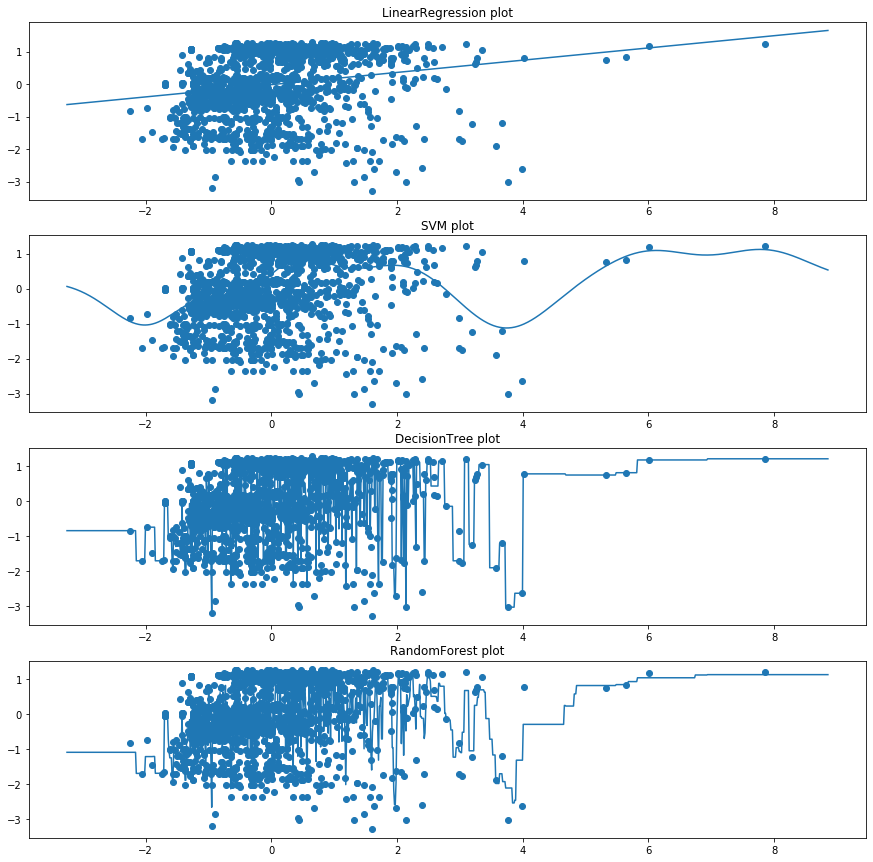

In [50]:
Third_Feature = run_different_methods(cases,X_12,est_names)

**For the TotalBsmtSF**

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


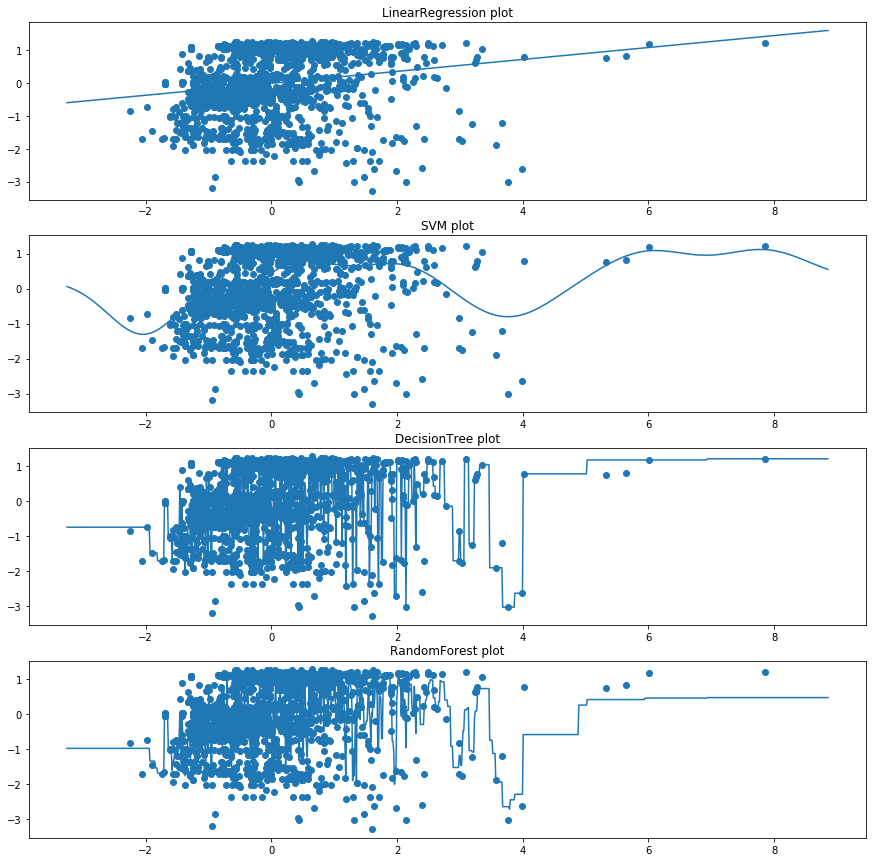

In [51]:
Fourth_Feature = run_different_methods(cases,X_13,est_names)

**For the 1stFlrSF**

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


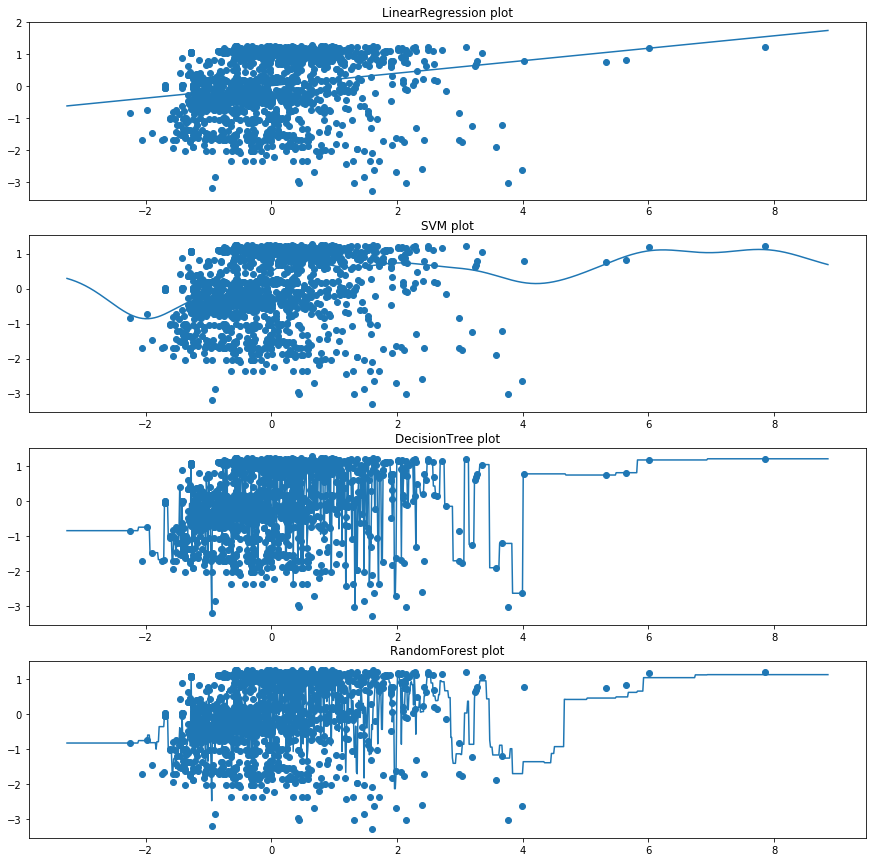

In [52]:
Fifth_Feature = run_different_methods(cases,X_14,est_names)

**Let's summarize the values again in one table**

In [53]:
table2 = pd.DataFrame()
table2['GrLivArea'] = First_Feature.values()
table2['YearBuilt'] = Second_Feature.values()
table2['GarageArea'] = Third_Feature.values()
table2['TotalBsmtSF'] = Fourth_Feature.values()
table2['1stFlrSF'] = Fifth_Feature.values()
table2.index = Second_Feature.keys()
table2

,GrLivArea,YearBuilt,GarageArea,TotalBsmtSF,1stFlrSF
LinearRegression,3.921740e+09,3.563613e+09,0.889188,0.921425,1.045333
SVM,5.926467e+09,6.532144e+09,0.967218,0.934197,1.111217
DecisionTree,3.536818e+09,5.664077e+09,1.338692,1.630931,1.258376
RandomForest,3.576969e+09,5.007041e+09,1.066092,1.238553,1.103096


**For the three features we have included, we see that the linear regression gives better results in all the three cases.**